# Practice Exercise: Exploratory Data Analysis

## Context:

- The dataset is related to the Portuguese "Vinho Verde" wine.
- Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

- This datasets can be viewed as classification or regression tasks.
- The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones).
- Outlier detection algorithms could be used to detect the few excellent or poor wines.
- Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


## Objective:

- The objective of this exercise is to analyse the characteristics of wine using statistical techniques (also known as Exploratory Data Analysis).

## Data Description:

Attribute Information: 

  - fixed acidity
  - volatile acidity
  - citric acid
  - residual sugar
  - chlorides
  - free sulfur dioxide
  - total sulfur dioxide
  - density
  - pH
  - sulphates
  - alcohol Output variable (based on sensory data)
  - quality (score between 0 and 10)

## 1. Import the libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Importing the dataset:

In [2]:
data = pd.read_csv('../files/wine_data.csv');

## 3. Check the information about data and data-types of each respective attributes:

In [4]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## 3.1 Check the number of null values.

In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## 4. EDA Descriptive Statistics:

### 4.1.  Measures of Central Tendency

Measures of Central Tendency define significant, representative and adequate values for a set of data, depending on what you want to analyze. They are the 

1. mean
2. median
3. quantiles and mode.

### 4.2 Check the  mean ,Mode, Median and Quantile for dataset?

#### Mean

In [6]:
data.mean()

fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
quality                   5.877909
dtype: float64

#### Mode

In [7]:
data.mode()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.8,0.28,0.3,1.2,0.044,29.0,111.0,0.992,3.14,0.5,9.4,6


#### Median and Quantile

In [14]:
data.median()

fixed acidity             6.80000
volatile acidity          0.26000
citric acid               0.32000
residual sugar            5.20000
chlorides                 0.04300
free sulfur dioxide      34.00000
total sulfur dioxide    134.00000
density                   0.99374
pH                        3.18000
sulphates                 0.47000
alcohol                  10.40000
quality                   6.00000
dtype: float64

### check (Quantile 25%,50%,75%) for dataset

#### Quantile 25%

In [15]:
data.quantile(0.25)

fixed acidity             6.300000
volatile acidity          0.210000
citric acid               0.270000
residual sugar            1.700000
chlorides                 0.036000
free sulfur dioxide      23.000000
total sulfur dioxide    108.000000
density                   0.991723
pH                        3.090000
sulphates                 0.410000
alcohol                   9.500000
quality                   5.000000
Name: 0.25, dtype: float64


#### Quantile 50%

In [16]:
data.quantile(0.50)

fixed acidity             6.80000
volatile acidity          0.26000
citric acid               0.32000
residual sugar            5.20000
chlorides                 0.04300
free sulfur dioxide      34.00000
total sulfur dioxide    134.00000
density                   0.99374
pH                        3.18000
sulphates                 0.47000
alcohol                  10.40000
quality                   6.00000
Name: 0.5, dtype: float64

#### Quantile 75%

In [17]:
data.quantile(0.75)

fixed acidity             7.3000
volatile acidity          0.3200
citric acid               0.3900
residual sugar            9.9000
chlorides                 0.0500
free sulfur dioxide      46.0000
total sulfur dioxide    167.0000
density                   0.9961
pH                        3.2800
sulphates                 0.5500
alcohol                  11.4000
quality                   6.0000
Name: 0.75, dtype: float64

## 5. Check the data description:

In [19]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## 6. Measures of Dispersion

Measures of Dispersion are measures that indicate how spread the data is, or how they vary. The measures of dispersion are range, variance, standard deviation and the absolute deviation, or mean absolute deviation.

### 6.1 check the Range,Variance,Standard Deviation,Absolute Deviation or Mean Absolute Deviation?

In [20]:
data.quantile(0.75) - data.quantile(0.25)

fixed acidity            1.000000
volatile acidity         0.110000
citric acid              0.120000
residual sugar           8.200000
chlorides                0.014000
free sulfur dioxide     23.000000
total sulfur dioxide    59.000000
density                  0.004377
pH                       0.190000
sulphates                0.140000
alcohol                  1.900000
quality                  1.000000
dtype: float64

#### The above output represents the IQR values for all the attributes.

#### Range

In [21]:
data.max() - data.min()

fixed acidity            10.40000
volatile acidity          1.02000
citric acid               1.66000
residual sugar           65.20000
chlorides                 0.33700
free sulfur dioxide     287.00000
total sulfur dioxide    431.00000
density                   0.05187
pH                        1.10000
sulphates                 0.86000
alcohol                   6.20000
quality                   6.00000
dtype: float64

#### The above output represents the difference between the highest and the lowest values for each individual attributes.

#### Variance

In [29]:
data.var()

fixed acidity              0.712114
volatile acidity           0.010160
citric acid                0.014646
residual sugar            25.725770
chlorides                  0.000477
free sulfur dioxide      289.242720
total sulfur dioxide    1806.085491
density                    0.000009
pH                         0.022801
sulphates                  0.013025
alcohol                    1.514427
quality                    0.784356
dtype: float64

#### The above output represents the data dispersion on the square scale.

#### Standard Deviation

In [30]:
data.std()

fixed acidity            0.843868
volatile acidity         0.100795
citric acid              0.121020
residual sugar           5.072058
chlorides                0.021848
free sulfur dioxide     17.007137
total sulfur dioxide    42.498065
density                  0.002991
pH                       0.151001
sulphates                0.114126
alcohol                  1.230621
quality                  0.885639
dtype: float64

#### The above output shows how much the data deviated from the mean.

## 7. Covariance and Correlation

1. Covariance is a numerical measure that indicates the inter-dependency between two variables. 
2. Covariance indicates how two variables behave together in relation to their averages. 
3. A covariance of 0 indicates that the variables are totally independant, while a high and positive covariance value means that a variable is big when the other is big. Analogously, a negative covariance with a high absolute value means that one variable is big when the other is small.
4. Covariance can be calculated through the cov() function. 

### 7.1 Check the Covariance and Correlation scores . write your Observations?

#### Covariance

In [31]:
data.cov()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,0.712114,-0.001931,0.029533,0.381022,0.000426,-0.708919,3.266013,0.000670,-0.054265,-0.001651,-0.125533,-0.084947
volatile acidity,-0.001931,0.010160,-0.001823,0.032865,0.000155,-0.166300,0.382354,0.000008,-0.000486,-0.000411,0.008400,-0.017382
citric acid,0.029533,-0.001823,0.014646,0.057829,0.000302,0.193630,0.622989,0.000054,-0.002992,0.000861,-0.011278,-0.000987
residual sugar,0.381022,0.032865,0.057829,25.725770,0.009828,25.800578,86.531303,0.012727,-0.148684,-0.015435,-2.812740,-0.438316
chlorides,0.000426,0.000155,0.000302,0.009828,0.000477,0.037674,0.184687,0.000017,-0.000298,0.000042,-0.009684,-0.004062
free sulfur dioxide,-0.708919,-0.166300,0.193630,25.800578,0.037674,289.242720,444.865891,0.014966,-0.001587,0.114938,-5.234509,0.122878
total sulfur dioxide,3.266013,0.382354,0.622989,86.531303,0.184687,444.865891,1806.085491,0.067352,0.014894,0.652645,-23.476605,-6.576746
density,0.000670,0.000008,0.000054,0.012727,0.000017,0.014966,0.067352,0.000009,-0.000042,0.000025,-0.002871,-0.000814
pH,-0.054265,-0.000486,-0.002992,-0.148684,-0.000298,-0.001587,0.014894,-0.000042,0.022801,0.002688,0.022565,0.013297
sulphates,-0.001651,-0.000411,0.000861,-0.015435,0.000042,0.114938,0.652645,0.000025,0.002688,0.013025,-0.002448,0.005425


#### Observation:

- Hard to be understood and compared, because it gives us values in different scales as the variables change. 
- For a better comparison, we normalize covariance to a value that will always be between -1 and 1, so it can be better understood.

#### Correlation

In [32]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


#### Observation:
    
1. This value is the correlation. Correlation is always between -1, a perfect anti-correlation, and 1, perfect correlation
2. Finally, it is also important to note the famous concept that says that “correlation does not imply causation”.

## 8. Pairplot for checking correlation:

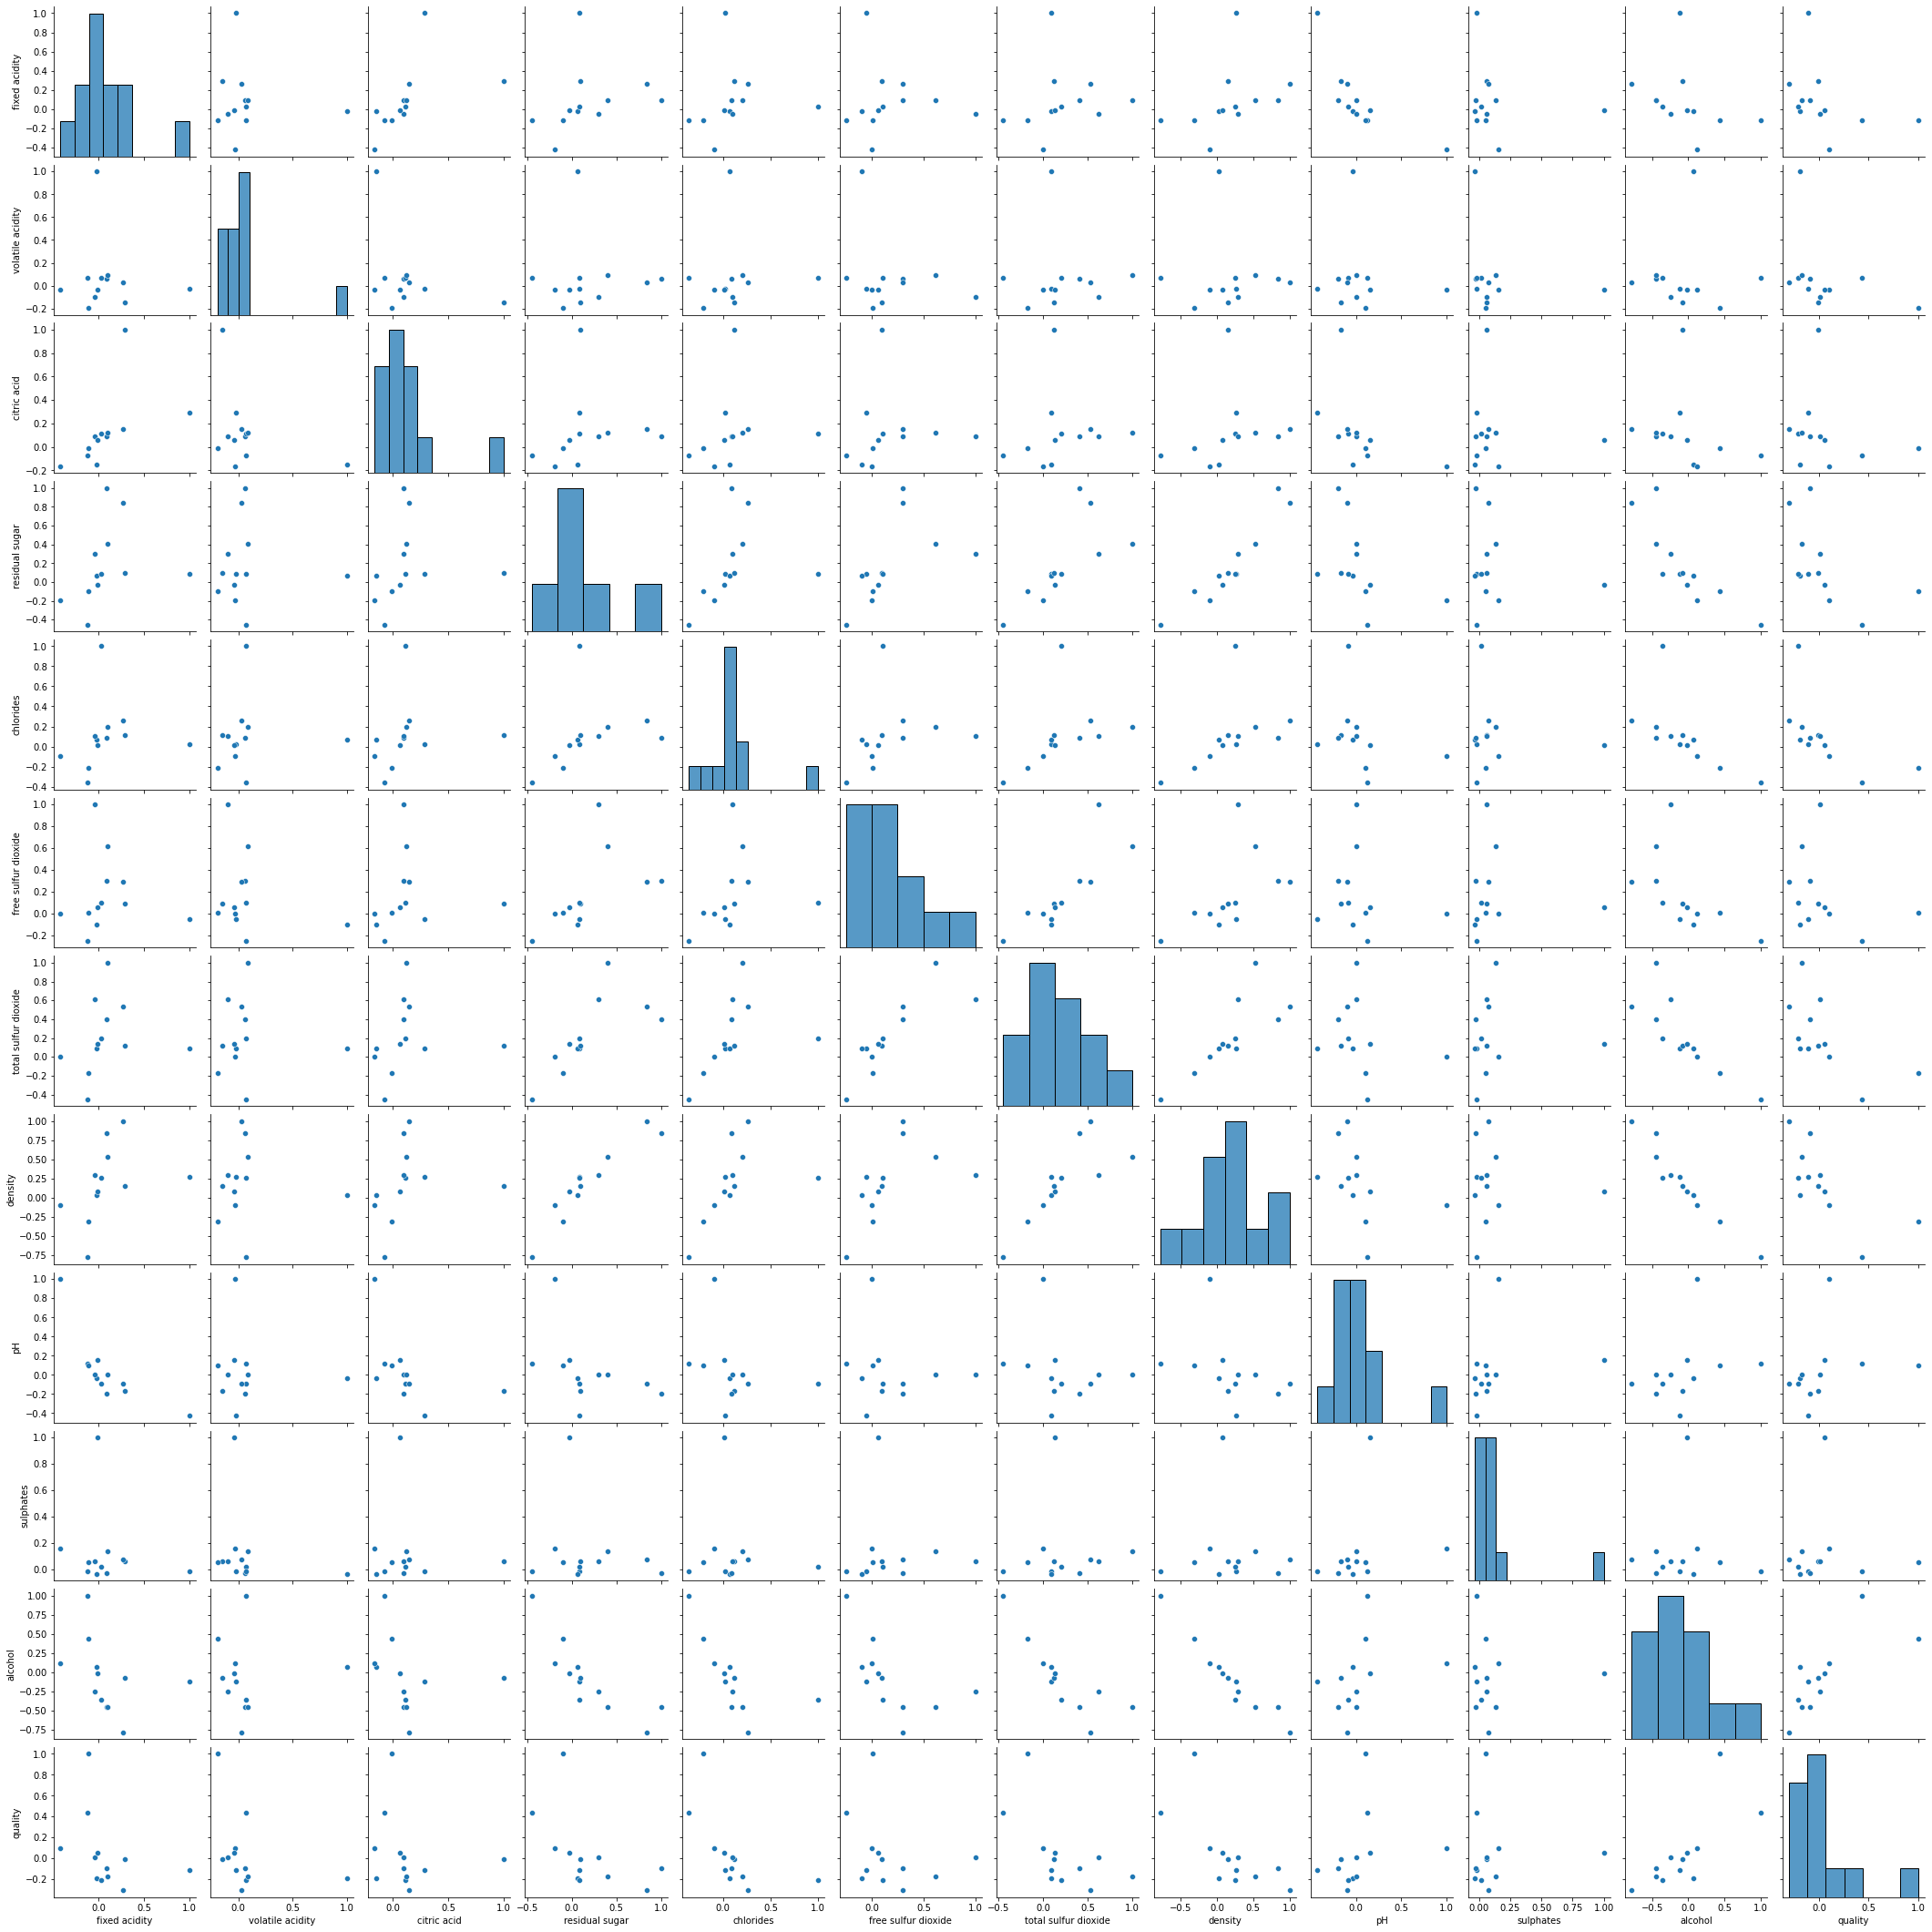

In [33]:
sns.pairplot(data.corr())

## 9. Heatmap of correlation:

<AxesSubplot:>

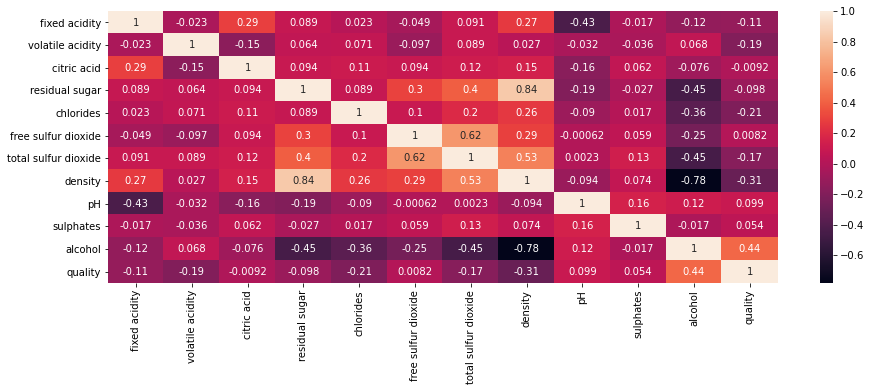

In [37]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(), annot=True)

## 10. Check the skewness:

In [38]:
data.skew()

fixed acidity           0.647751
volatile acidity        1.576980
citric acid             1.281920
residual sugar          1.077094
chlorides               5.023331
free sulfur dioxide     1.406745
total sulfur dioxide    0.390710
density                 0.977773
pH                      0.457783
sulphates               0.977194
alcohol                 0.487342
quality                 0.155796
dtype: float64

## 11. Check the distribution of 'quality' column using distplot.

/Users/ivansaucedo/opt/anaconda3/envs/aiml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

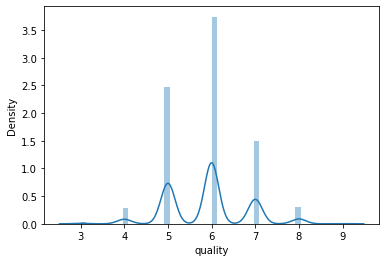

In [52]:
sns.distplot(data['quality'])

## 12. Make a separate dataframe of all columns except the "quality" column.

In [46]:
data01 = data.drop('quality', axis=1)
data01.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

## 13. Apply the feature scaling on the dataframe obtained in above step using StandardScalar():

In [54]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data01 = ss.fit_transform(data01)
data01

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])